In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
rc('font',family='Comic Sans MS')

r_0= 9.242 +/- 0.144
B = 142.970 +/- 
beta = 154.919 +/-


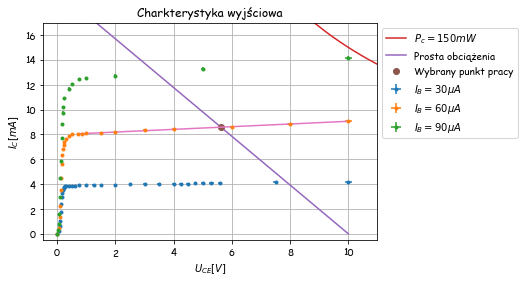

In [165]:
wyjsciowa3 = pd.read_csv('IB30.csv')
wyjsciowa6 = pd.read_csv('IB60.csv')
wyjsciowa9 = pd.read_csv('IB90.csv')
WykresoweU = np.linspace(0.1,10)
WykresoweI = np.linspace(0.1,14)
U_niepewnosc3 = wyjsciowa3['UCE[V]']*0.008 + 0.03
U_niepewnosc6 = wyjsciowa6['UCE[V]']*0.008 + 0.03
U_niepewnosc9 = wyjsciowa9['UCE[V]']*0.008 + 0.03
I_niepewnosc3 = wyjsciowa3['IC[mA]']*0.01 + 0.01
I_niepewnosc6 = wyjsciowa6['IC[mA]']*0.01 + 0.01
I_niepewnosc9 = wyjsciowa9['IC[mA]']*0.01 + 0.01
plt.errorbar(wyjsciowa3['UCE[V]'],wyjsciowa3['IC[mA]'],I_niepewnosc3,U_niepewnosc3,'.',label=r'$I_B=30\mu A$')
plt.errorbar(wyjsciowa6['UCE[V]'],wyjsciowa6['IC[mA]'],I_niepewnosc6,U_niepewnosc6,'.',label=r'$I_B=60\mu A$')
plt.errorbar(wyjsciowa9['UCE[V]'],wyjsciowa9['IC[mA]'],I_niepewnosc9,U_niepewnosc9,'.',label=r'$I_B=90\mu A$')
plt.grid()
plt.xlabel(r'$U_{CE}[V]$')
plt.ylabel(r'$I_C[mA]$')
plt.title('Charakterystyka wyjściowa')
plt.legend(loc='best')
pc15 = 150 #mW
UWykresowe15 = np.linspace(2,15) 
plt.plot(UWykresowe15,pc15/UWykresowe15,'-',label=r'$P_c = 150mW$')
R = 510 #Om
U = 10 #V
plt.plot([0,U],[U/R*1e3,0],label='Prosta obciążenia')
plt.xlabel(r'$U_{CE}[V]$')
plt.ylabel(r'$I_C[mA]$')
plt.title('Charkterystyka wyjściowa')
plt.ylim(-0.5,17)
plt.xlim(-0.5,11)
zakres3 = wyjsciowa3['UCE[V]'] > 0.5
zakres6 = wyjsciowa6['UCE[V]'] > 0.5
zakres9 = wyjsciowa9['UCE[V]'] > 0.5
prosta3, prostaCov3 = np.polyfit(wyjsciowa3['UCE[V]'][zakres3].values,wyjsciowa3['IC[mA]'][zakres3].values,1,cov=True)
prosta6, prostaCov6 = np.polyfit(wyjsciowa6['UCE[V]'][zakres6].values,wyjsciowa6['IC[mA]'][zakres6].values,1,cov=True)
prosta9, prostaCov9 = np.polyfit(wyjsciowa9['UCE[V]'][zakres9].values,wyjsciowa9['IC[mA]'][zakres9].values,1,cov=True)
U_pracy = 5.62 #V
I_pracy = 5.62*prosta6[0]+prosta6[1] #mA
plt.plot(U_pracy,I_pracy,'o',label='Wybrany punkt pracy')
leg = plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.plot(wyjsciowa6['UCE[V]'][zakres6],wyjsciowa6['UCE[V]'][zakres6]*prosta6[0]+prosta6[1])
plt.savefig('Wyjsciowa.png',bbox_extra_artists=(leg,), bbox_inches='tight')
print('r_0= {:.3f} +/- {:.3f}'.format(1/prosta6[0],np.sqrt(prostaCov6[0,0])/prosta6[0]**2))
B = I_pracy/60e-3
print('B = {:.3f} +/- '.format(B))
beta = ((U_pracy*prosta9[0]+prosta9[1])-(U_pracy*prosta3[0]+prosta3[1]))/60e-3
print('beta = {:.3f} +/-'.format(beta))

I_B zeby I_C = 10mA: 0.065
r_e = 469.548


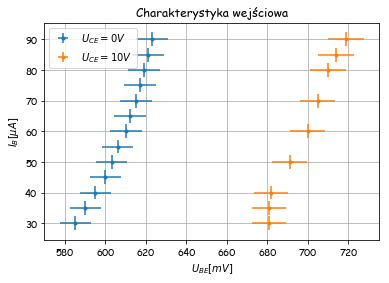

In [163]:
wejsciowa0 = pd.read_csv('UCE0.csv') # U[mV] I[miA]
wejsciowa1 = pd.read_csv('UCE1.csv')
U_niepewnosc0 = wejsciowa0['UBE[mV]']*0.008 +3
U_niepewnosc1 = wejsciowa1['UBE[mV]']*0.008 +3
I_niepewnosc = 0.015*150
plt.errorbar(wejsciowa0['UBE[mV]'],wejsciowa0['iB[miA]'],I_niepewnosc,U_niepewnosc0,'.',label=r'$U_{CE}=0V$')
plt.errorbar(wejsciowa1['UBE[mV]'],wejsciowa1['iB[miA]'],I_niepewnosc,U_niepewnosc1,'.',label=r'$U_{CE}=10V$')
def Schockley(U_BE,I_BS):
    return I_BS*(np.exp(U_BE/26e-3)-1)
I_BS, I_BS_Cov = curve_fit(Schockley,wejsciowa0['UBE[mV]']*1e-3,wejsciowa0['iB[miA]'],)
# plt.plot(wejsciowa0['UBE[mV]'],Schockley(wejsciowa0['UBE[mV]']*1e-3,I_BS),label='dopasowana krzywa 0V')
plt.grid()
plt.xlabel(r'$U_{BE}[mV]$')
plt.ylabel(r'$I_B[\mu A]$')
plt.title('Charakterystyka wejściowa')
plt.legend(loc='best')
print('I_B zeby I_C = 10mA: {:.3f}'.format(10/beta))
print('r_e = {:.3f}'.format(beta*26/I_pracy))
plt.savefig('Wejsciowa.png',dpi=150)
UB3 = wejsciowa0['UBE[mV]'][0]
UB6 = wejsciowa0['UBE[mV]'][6]
UB9 = wejsciowa0['UBE[mV]'][12]

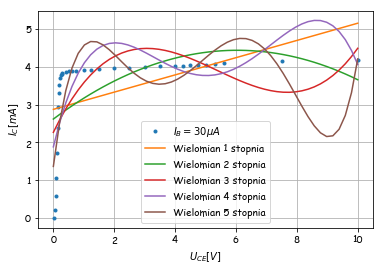

In [7]:
plt.plot(wyjsciowa3['UCE[V]'],wyjsciowa3['IC[mA]'],'.',label=r'$I_B=30\mu A$')
Uwykresowe = np.linspace(0,10)
for n in range(1,6):
    krzywa = np.polyfit(wyjsciowa3['UCE[V]'],wyjsciowa3['IC[mA]'],n)
    plt.plot(Uwykresowe,np.polyval(krzywa,Uwykresowe),label='Wielomian {:d} stopnia'.format(n))
plt.legend()
plt.grid()
plt.xlabel(r'$U_{CE}[V]$')
plt.ylabel(r'$I_C[mA]$')
# plt.savefig('ZabawyZPolyfitem.png')
# plt.savefig('ZabawyZPolyfitem4.png')

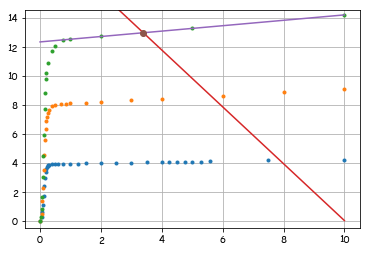

In [89]:
plt.plot(wyjsciowa3['UCE[V]'],wyjsciowa3['IC[mA]'],'.',label=r'$I_B=30\mu A$')
plt.plot(wyjsciowa6['UCE[V]'],wyjsciowa6['IC[mA]'],'.',label=r'$I_B=60\mu A$')
plt.plot(wyjsciowa9['UCE[V]'],wyjsciowa9['IC[mA]'],'.',label=r'$I_B=90\mu A$')
plt.plot([0,U],[U/R*1e3,0],label='Prosta obciążenia')
plt.ylim(-0.5,14.5)
U_pelne = np.linspace(0,10)
plt.plot(U_pelne,np.polyval(prosta9,U_pelne))
U3 = 7.90
I3 = np.polyval(prosta3,U3)
I_pracy= np.polyval(prosta6,U_pracy)
U9 = 3.375
I9 = np.polyval(prosta9,U9)
plt.plot(U9,I9,'o')
plt.grid()

In [138]:
U_CE3 = wyjsciowa3['UCE[V]']
U_CE6 = wyjsciowa6['UCE[V]']
U_CE9 = wyjsciowa9['UCE[V]']
I_C3 = wyjsciowa3['IC[mA]']
I_C6 = wyjsciowa6['IC[mA]']
I_C9 = wyjsciowa9['IC[mA]']
U_BE = wejsciowa0['UBE[mV]']
I_b = wejsciowa0['iB[miA]']
U_sinus = np.linspace(UB3,UB9*1.1)
I_B = [30, 60, 90]
I_C = [I3, I_pracy, I9]
UBEK = [UB3, UB6, UB9]
UCEK = [U3, U_pracy, U9]
# plt.plot(U_sinus,(I3-I_pracy)*np.cos((U_sinus-U3)*np.pi/(U3-U9))+I_pracy,label=r'Dopasowany $\sin$') # neat!

-119.07894736842107

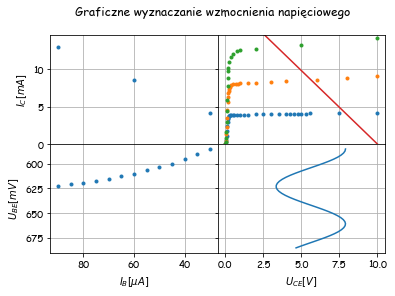

In [159]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, 'col', 'row', gridspec_kw = {'wspace':0, 'hspace':0})
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.plot(I_b, U_BE,'.')
ax2.plot(U_CE3,I_C3,'.')
ax2.plot(U_CE6,I_C6,'.')
ax2.plot(U_CE9,I_C9,'.')
ax2.plot([0,U],[U/R*1e3,0],label='Prosta obciążenia')
ax1.set_ylim(0,14.5)
ax1.plot(I_B, I_C,'.')
# ax4.plot(UCEK, UBEK,'.')
ax4.plot((U3-U_pracy)*np.cos((U_sinus-UB3)*np.pi/(UB3-UB9))+U_pracy,U_sinus)
ax3.set_xlabel(r'$I_B[\mu A]$')
ax3.set_ylabel(r'$U_{BE}[mV]$')
ax1.set_ylabel(r'$I_C[mA]$')
ax4.set_xlabel(r'$U_{CE}[V]$')
plt.suptitle('Graficzne wyznaczanie wzmocnienia napięciowego')
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
fig.savefig('JEDEN.png')
(U3-U9)/(UB3-UB9)*1e3

In [160]:
2.3/20*1e3

114.99999999999999